In [2]:
import numpy as np
import networkx as nx
import torch
from torch_geometric.data import Data
import time

import random
from torch_geometric.utils import from_networkx

import matplotlib.pyplot as plt

from torch_geometric.nn import SAGEConv

from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
import torch.nn.functional as F

import sys
sys.path.insert(1,'../src')
from DataLoader_rad import RGGDataset_rad
from TwoLayerGraphSage import GCN, cGCN

import os.path as osp

from torch_geometric.data import Dataset, download_url

import os

/home/math/maskey/anaconda3/envs/pyg_cuda102/lib/python3.8/site-packages/torch_geometric/data/storage.py:244: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
11:38:04|TQ-INFO| Initializing torchquad.


In [3]:
DL = RGGDataset_rad(root = '//home/groups/ai/maskey/input_rad')

dataset = DL.get(5,50)

In [4]:
positions = torch.load('//home/groups/ai/maskey/input_rad/raw/positions_1000_10.pt')

In [5]:
model = GCN()
model.load_state_dict(torch.load( '../models/GCNTwoLayersGraphSage'))

cGCNN = cGCN()
cGCNN.load_state_dict(torch.load( '../models/cGCNTwoLayersGraphSage'))

<All keys matched successfully>

In [6]:
L2Errors = []
start = time.time()

low_pass = lambda x:  (1+(torch.tensor(x[:,0]**2 + x[:,1]**2))).pow_(-1)
#low_pass = lambda x:  x[:,0]*x[:,1]

In [7]:
y = torch.rand(1000,1)

In [8]:
cdata = DL.get(1,1000)
cpos = positions[99]
signall = low_pass(cpos[0])
signall = torch.reshape(signall,( len(signall),1))
#cdata.x = signall 
#cdata.x = y 

<ipython-input-6-c88197d29211>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  low_pass = lambda x:  (1+(torch.tensor(x[:,0]**2 + x[:,1]**2))).pow_(-1)


In [9]:
def L2Err(j):
    L2Errors = []
    for i in range(1,11):
        pos = positions[int((j-10)/10)]
        signal = signall[pos[1].type(torch.LongTensor)]
        signal = torch.reshape(signal,( len(signal),1))
        data = DL.get(i, j)
        data.x = signal
        cdata = DL.get(i,1000)
        cdata.x = signall
        output = model.forward(cdata)
        nodeErrors = output[pos[1].type(torch.LongTensor)] - model.forward(data)
        L2Error = torch.sqrt(1/len(nodeErrors)*torch.sum(torch.pow(nodeErrors,2)))
        L2Errors.append(L2Error)
    return L2Errors

In [10]:
L2=[]

In [11]:
for j in range(100,1000,100):
    L2.append(L2Err(j))

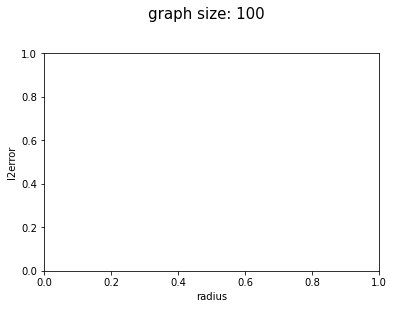

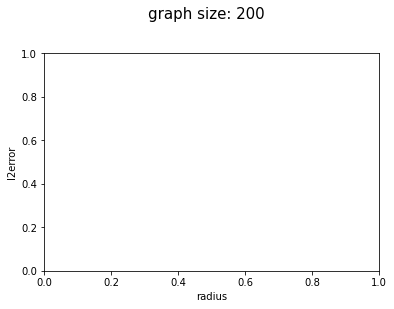

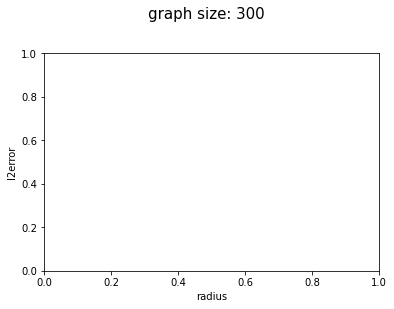

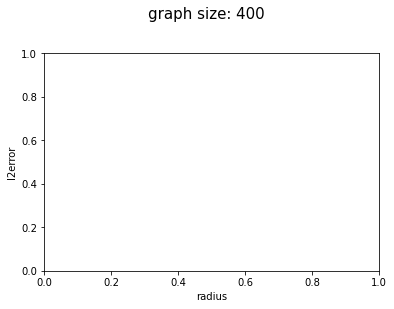

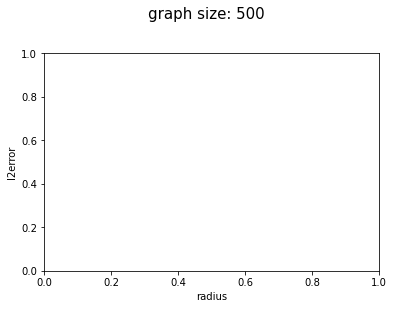

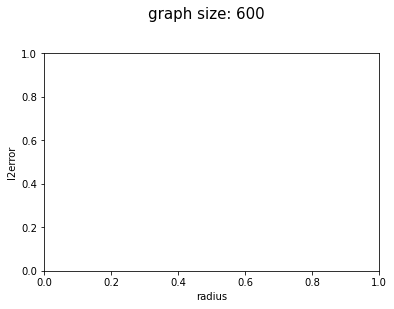

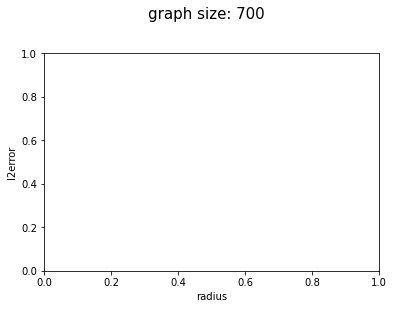

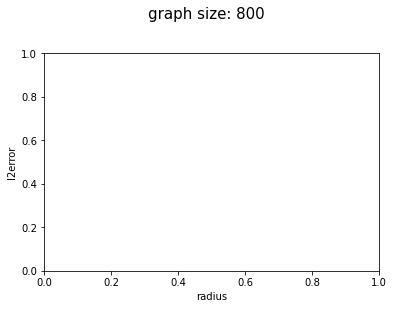

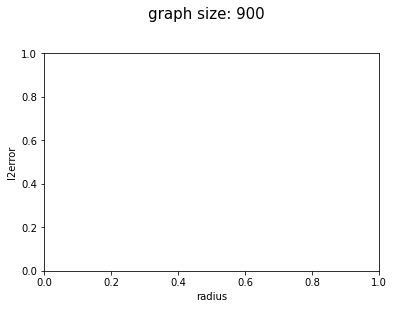

In [12]:
for i in range(0,9):
    xAxis = list(range(0,9))
    fig = plt.figure()
    txt="graph size: " + str((i+1)*100)
    plt.figtext(0.5, 1, txt, wrap=True, horizontalalignment='center', fontsize=15)

    plt.xlabel('radius')
    plt.ylabel('l2error')
    err = [x.detach().numpy() for x in L2[i]]

In [21]:
errs = []

In [22]:
for i in range(0,9):
    errs = [x.detach().numpy() for x in L2[i]]

In [ ]:
xAxis = list(range(0,9))
fig = plt.figure()
plt.xlabel('radius')
plt.ylabel('l2error')
plt.plot(xAxis,errs[0][:-1],label='100 nodes')

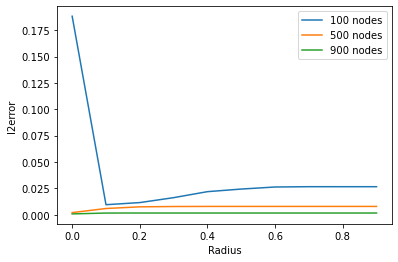

In [45]:
xAxis = list(range(0,10))
xAxis = [x/10 for x in xAxis]
fig = plt.figure()
plt.xlabel('Radius')
plt.ylabel('l2error')
#txt="radius: " + str((radius)/10)
#plt.figtext(0.5, 1, txt, wrap=True, horizontalalignment='center', fontsize=15)
plt.plot(xAxis,[x.detach().numpy() for x in L2[0]],label='100 nodes')
plt.plot(xAxis, [x.detach().numpy() for x in L2[4]], label='500 nodes')
plt.plot(xAxis,[x.detach().numpy() for x in L2[8]],label='900 nodes')
plt.legend()
#fig.savefig('../output/l2Error' + str(1002) + 'Nodes.png', dpi=fig.dpi)

In [37]:
xAxis = list(range(0,10))

In [42]:
xAxis = [x/10 for x in xAxis]

In [43]:
xAxis

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.06999999999999999, 0.08, 0.09]